# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
         
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto carreno
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | akdagmadeni
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | chisinau
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | selje
Processing Record 8 of Set 1 | oriximina
Processing Record 9 of Set 1 | saleaula
City not found. Skipping...
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | bagdarin
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | warrington
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])


# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto carreno,6.1890,-67.4859,29.99,66,40,4.12,CO,1669748051
1,vaini,-21.2000,-175.2000,25.09,78,20,5.14,TO,1669748052
2,akdagmadeni,39.6603,35.8836,6.43,78,100,2.19,TR,1669748053
3,dikson,73.5069,80.5464,-10.23,95,100,2.74,RU,1669748053
4,chisinau,47.0056,28.8575,3.24,99,100,3.60,MD,1669748054


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto carreno,6.1890,-67.4859,29.99,66,40,4.12,CO,1669748051
1,vaini,-21.2000,-175.2000,25.09,78,20,5.14,TO,1669748052
2,akdagmadeni,39.6603,35.8836,6.43,78,100,2.19,TR,1669748053
3,dikson,73.5069,80.5464,-10.23,95,100,2.74,RU,1669748053
4,chisinau,47.0056,28.8575,3.24,99,100,3.60,MD,1669748054


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

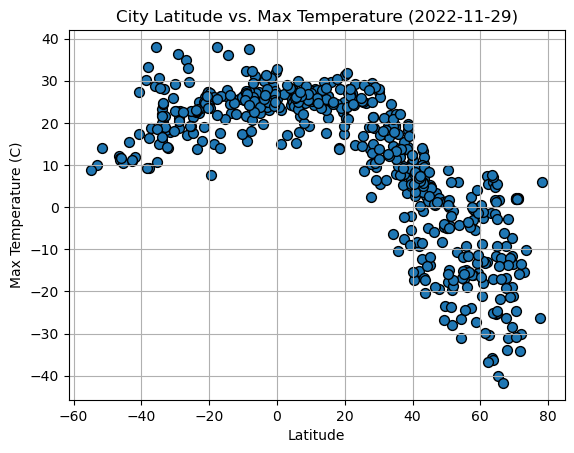

In [51]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', title="City Latitude vs. Max Temperature (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

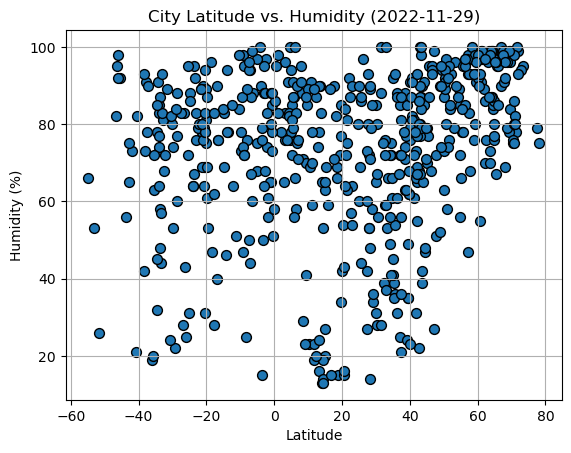

In [52]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', title="City Latitude vs. Humidity (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

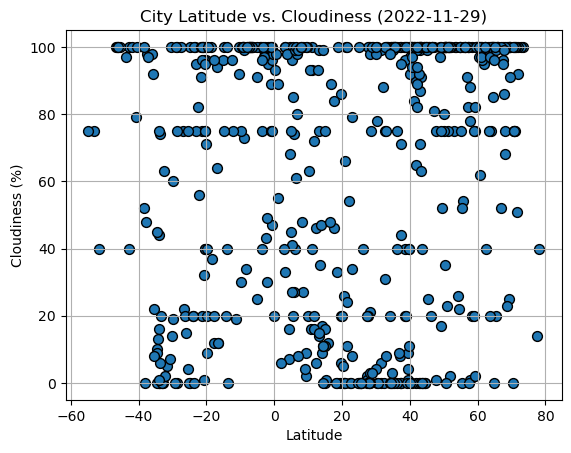

In [53]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', title="City Latitude vs. Cloudiness (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

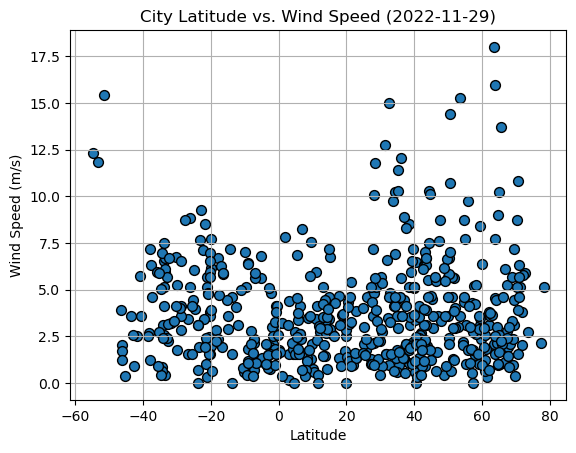

In [54]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', title="City Latitude vs. Wind Speed (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def get_linreg(x, y):

    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    regress = x * slope + intercept
    rstring = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    rv = f"The r-value is: {rvalue**2}"
    cv = f"Correlation value: {round(pearsonr(x, y)[0], 2)}"

    return regress, rstring, rv, cv

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto carreno,6.1890,-67.4859,29.99,66,40,4.12,CO,1669748051
2,akdagmadeni,39.6603,35.8836,6.43,78,100,2.19,TR,1669748053
3,dikson,73.5069,80.5464,-10.23,95,100,2.74,RU,1669748053
4,chisinau,47.0056,28.8575,3.24,99,100,3.60,MD,1669748054
6,selje,62.0459,5.3510,7.43,70,100,3.08,NO,1669748056


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vaini,-21.2000,-175.2000,25.09,78,20,5.14,TO,1669748052
5,punta arenas,-53.1500,-70.9167,10.06,53,75,11.83,CL,1669747972
7,oriximina,-1.7656,-55.8661,29.56,61,95,2.11,BR,1669748056
8,touros,-5.1989,-35.4608,27.31,68,91,5.60,BR,1669748057
12,rikitea,-23.1203,-134.9692,22.40,76,95,7.67,PF,1669748059


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6901943126023012


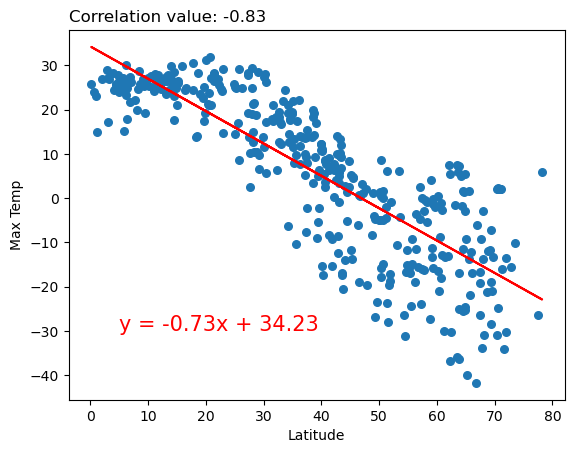

In [104]:
# Linear regression on Northern Hemisphere
# Create base scatter plot
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y, eq, rval, cval = get_linreg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], y, color='red')
plt.annotate(eq, (5, -30), fontsize=15, color='red')
plt.title(cval, loc='left')

# Display results
print(rval)
plt.show()


The r-value is: 0.274520449829531


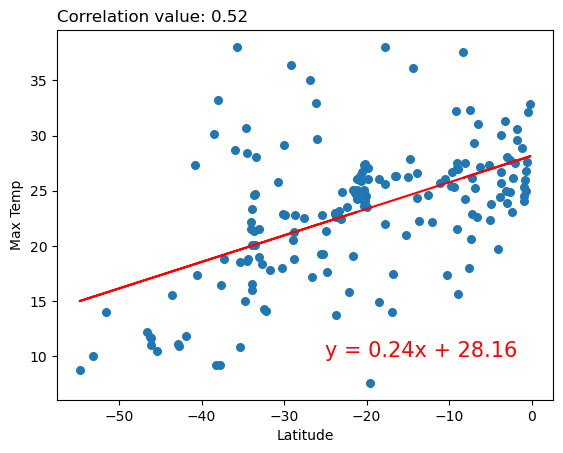

In [105]:
# Linear regression on Southern Hemisphere
# Create base scatter plot
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y2, eq2, rval2, cval2 = get_linreg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], y2, color='red')
plt.annotate(eq2, (-25, 10), fontsize=15, color='red')
plt.title(cval2, loc='left')

# Display results
print(rval2)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1248034435432278


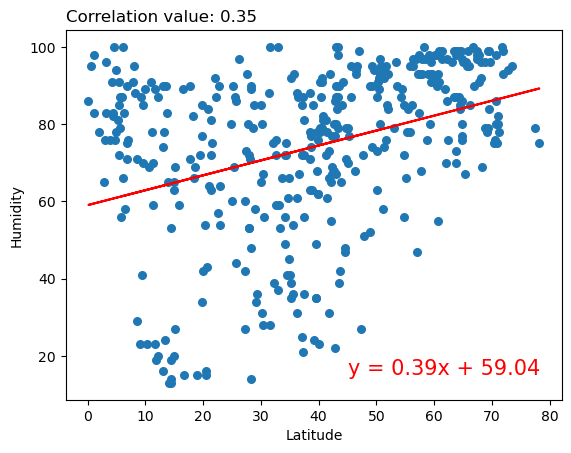

In [106]:
# Northern Hemisphere
# Create base scatter plot
northern_hemi_df.plot.scatter(x='Lat', y='Humidity', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y3, eq3, rval3, cval3 = get_linreg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], y3, color='red')
plt.annotate(eq3, (45, 15), fontsize=15, color='red')
plt.title(cval3, loc='left')

# Display results
print(rval3)
plt.show()

The r-value is: 0.016947299326019086


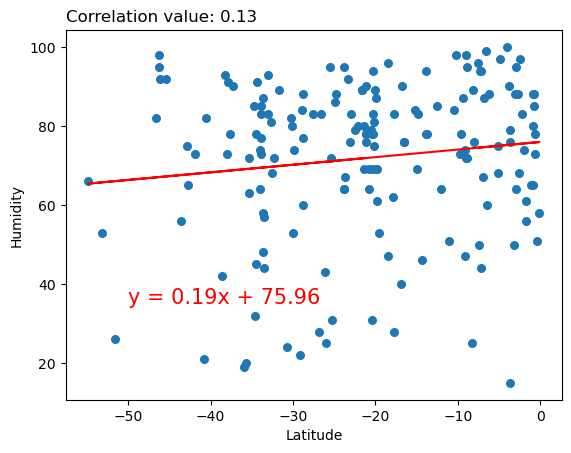

In [107]:
# Southern Hemisphere
# Create base scatter plot
southern_hemi_df.plot.scatter(x='Lat', y='Humidity', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y4, eq4, rval4, cval4 = get_linreg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], y4, color='red')
plt.annotate(eq4, (-50, 35), fontsize=15, color='red')
plt.title(cval4, loc='left')

# Display results
print(rval4)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08921880357639261


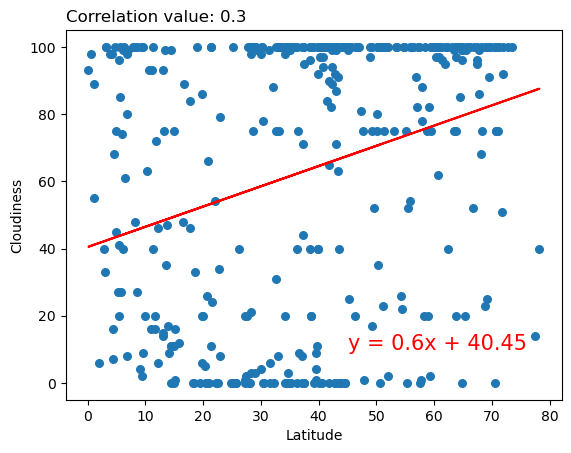

In [108]:
# Northern Hemisphere
# Create base scatter plot
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y5, eq5, rval5, cval5 = get_linreg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], y5, color='red')
plt.annotate(eq5, (45, 10), fontsize=15, color='red')
plt.title(cval5, loc='left')

# Display results
print(rval5)
plt.show()


The r-value is: 0.08164426375063623


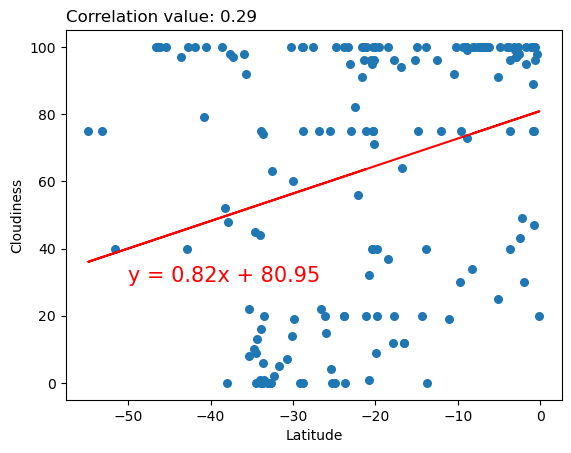

In [109]:
# Southern Hemisphere
# Create base scatter plot
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y6, eq6, rval6, cval6 = get_linreg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], y6, color='red')
plt.annotate(eq6, (-50, 30), fontsize=15, color='red')
plt.title(cval6, loc='left')

# Display results
print(rval6)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023502162347901107


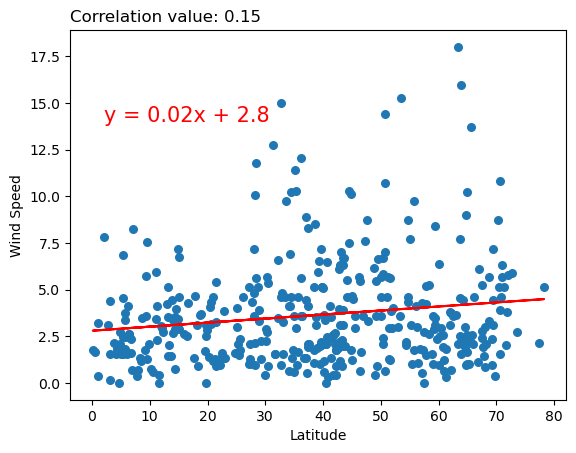

In [110]:
# Northern Hemisphere
# Create base scatter plot
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y7, eq7, rval7, cval7 = get_linreg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], y7, color='red')
plt.annotate(eq7, (2, 14), fontsize=15, color='red')
plt.title(cval7, loc='left')

# Display results
print(rval7)
plt.show()


The r-value is: 0.09681521697055209


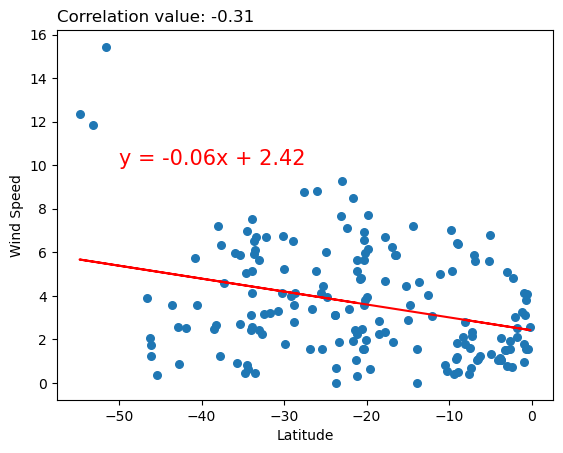

In [111]:
# Southern Hemisphere
# Create base scatter plot
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=30)
plt.xlabel('Latitude')

# Run linear regression function & plot results
y8, eq8, rval8, cval8 = get_linreg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], y8, color='red')
plt.annotate(eq8, (-50, 10), fontsize=15, color='red')
plt.title(cval8, loc='left')

# Display results
print(rval8)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE